In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pickle

from core import qlearning as q
from core import prices as pr

## Variation du $\alpha$:

Je trouve les résultats assez aléatoires

Intuition : 

In [2]:
# Path to the pickle file
pickle_file_path = '/Volumes/OS-Data/Suzie_data/RLandPricing/data/data_alpha.pkl'

# Open the file in binary read mode
with open(pickle_file_path, 'rb') as file:
    aggregated_agents = pickle.load(file)

# Now, "aggregated_agents" contains the object saved in the pickle file
print(aggregated_agents)

[array([[0.31797924, 0.24630712],
       [0.27230243, 0.27375055],
       [0.27079472, 0.27496558],
       ...,
       [0.27445958, 0.29694914],
       [0.29195608, 0.28890995],
       [0.3037974 , 0.28202212]]), array([[0.27612473, 0.26730679],
       [0.2700574 , 0.29746026],
       [0.26034162, 0.29518517],
       ...,
       [0.30075007, 0.30344586],
       [0.29627084, 0.29687614],
       [0.29484863, 0.28808318]]), array([[0.28780462, 0.30767515],
       [0.29172043, 0.28928238],
       [0.23569619, 0.29433624],
       ...,
       [0.29953936, 0.29107091],
       [0.28943374, 0.28767838],
       [0.29659936, 0.28107075]]), array([[0.22723181, 0.27763375],
       [0.2872953 , 0.28027593],
       [0.24790549, 0.31579953],
       ...,
       [0.29885866, 0.28621713],
       [0.29673033, 0.29119578],
       [0.28712406, 0.29985067]]), array([[0.25057911, 0.31550916],
       [0.29125212, 0.28062522],
       [0.27297042, 0.28882296],
       ...,
       [0.26467592, 0.28891951],
       

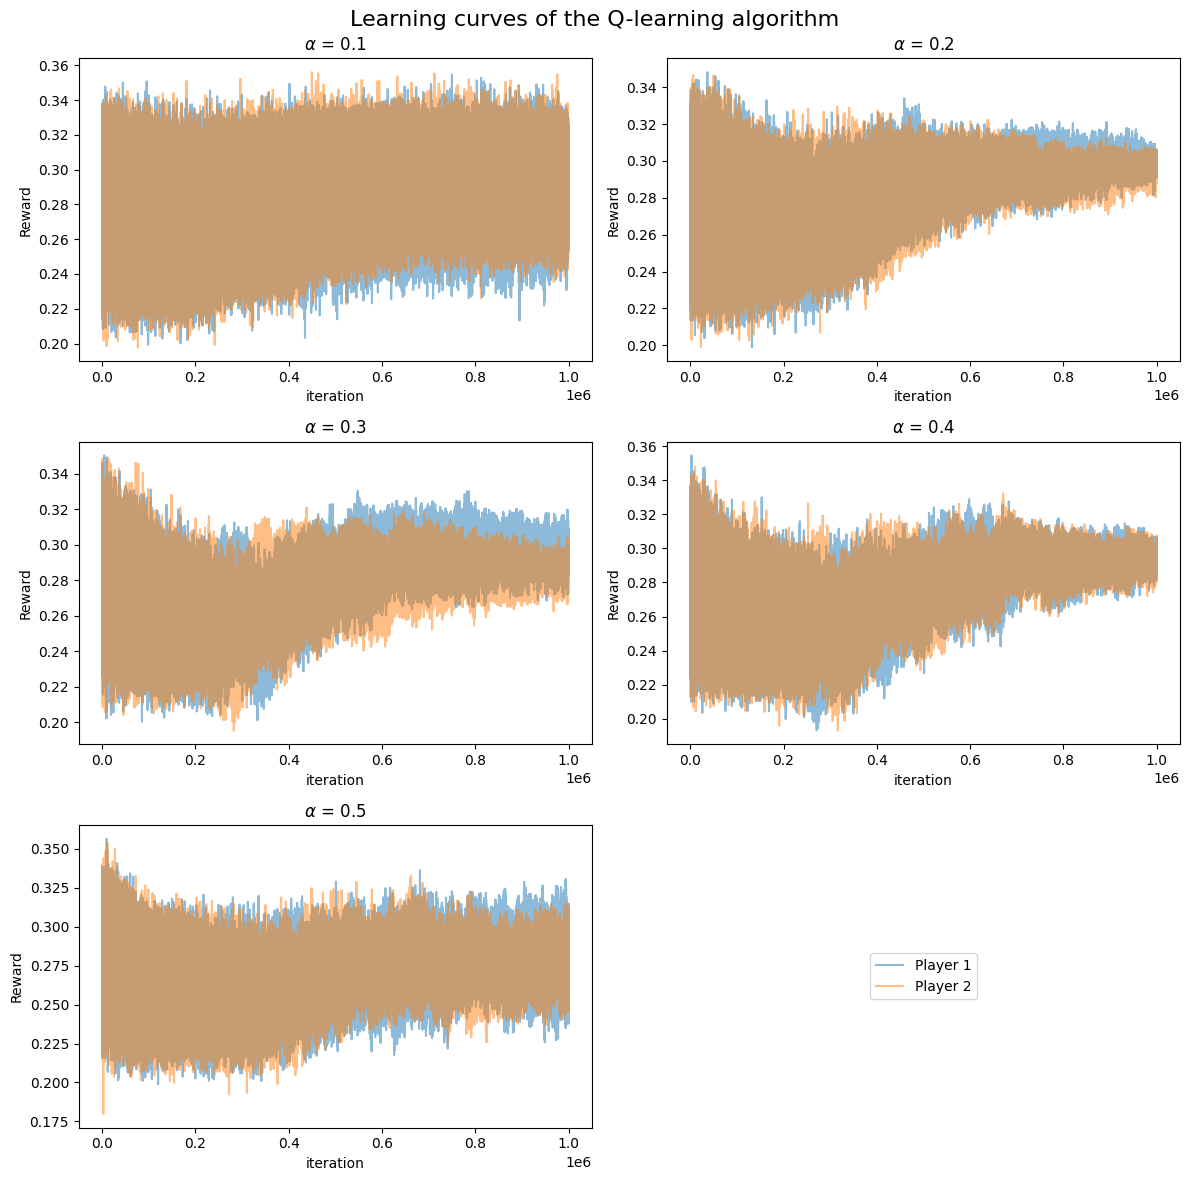

In [3]:
num_players = 2
num_graphs = len(aggregated_agents)
alpha = [0.1, 0.2, 0.3, 0.4, 0.5]

# Create a figure with a 3x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Flatten the axes array to iterate over the subplots
axes = axes.flatten()

# Loop to iterate through the periods and subplots
for graph_num in range(num_graphs):
    ax = axes[graph_num]
    num_players = len(aggregated_agents[graph_num][0])
    # Plot curves for each player in the subplot
    for player in range(num_players):
        ax.plot(aggregated_agents[graph_num][:, player], alpha=0.5, label=f'Player {player + 1}')
    
    # Set the title of the subplot with the corresponding period
    ax.set_title(f'$\\alpha$ = {alpha[graph_num]}')
    
    # Set the labels of the subplot
    ax.set_xlabel('iteration')
    ax.set_ylabel('Reward')


# Remove any unused subplots
if num_graphs < 5:
    for i in range(num_graphs, 5):
        fig.delaxes(axes[i])

# Create a legend in the last subplot
legend_ax = axes[-1]
legend_ax.axis('off')

# Get the legend handles and labels from the first subplot
handles, labels = axes[0].get_legend_handles_labels()

# Create the legend in the last subplot
legend_ax.legend(handles, labels, loc='center')

fig.suptitle('Learning curves of the Q-learning algorithm', fontsize=16)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [4]:
prices = pr.PriceOptimizer()
collusion_profit, collusion_prices = prices.CollusionPrice()
nash_profit, nash_prices = prices.NashPrice()
RN = nash_profit
RC = collusion_profit
    
Rmean = np.zeros((len(aggregated_agents), 2))
DRmean = np.zeros((len(aggregated_agents), 2))   
    
for i in range (len(aggregated_agents)): 
    for j in range (2):
        Rmean[i][j] = aggregated_agents[i][-100:,j].mean()
        DRmean[i][j] = (Rmean[i][j] - RN)/(RC - RN) 

print(DRmean)

[[0.57726661 0.60658894]
 [0.6699761  0.6409227 ]
 [0.63311998 0.5478697 ]
 [0.62915111 0.61773875]
 [0.48873408 0.49024254]]


[0.59192777 0.6554494  0.59049484 0.62344493 0.48948831]


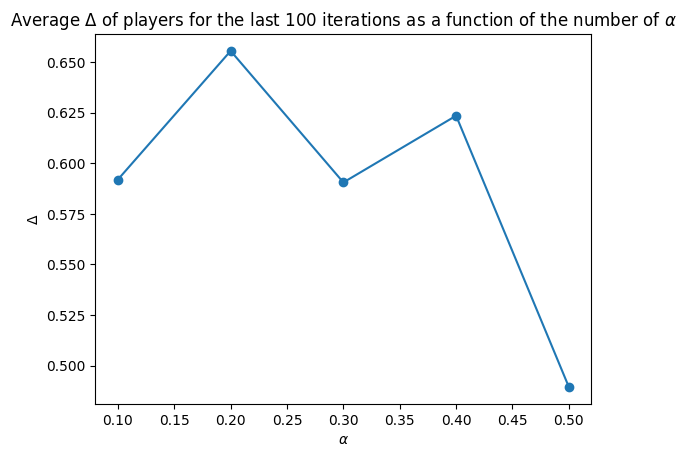

In [5]:
av = np.mean(DRmean, axis=1)
print(av)
plt.plot(alpha,av, linestyle='-', marker='o')
plt.xlabel('$\\alpha$')
plt.ylabel('$\\Delta$')
plt.title('Average $\\Delta$ of players for the last 100 iterations as a function of the number of $\\alpha$')
plt.show()